## Rezervace

Vyzkoušej rozhodovací strom na datové sadě o kostatcích ([IRIS.csv](IRIS.csv)). U datové sady nemusíš provádět žádné úpravy (OneHot encoding není potřeba, protože jsou tam pouze numerické hodnoty, a Scale není obecně u rozhodovacích stromů potřeba). Zkus vytvořit nízký strom, který má max. 4 patra. Strom si zobraz jako obrázek. Vypočti metriku `accuracy` pro tento strom.

V další části zkus vyhledat optimální parametry rozhodovacího stromu pomocí `GridSearchCV`. 

In [57]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data = pd.read_csv("hotel_bookings.csv")
data.head()

data = data.dropna(subset=["children"])

In [58]:
data["is_canceled"].value_counts()

is_canceled
0    75166
1    44220
Name: count, dtype: int64

In [59]:
X = data[["lead_time"]]
y = data["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

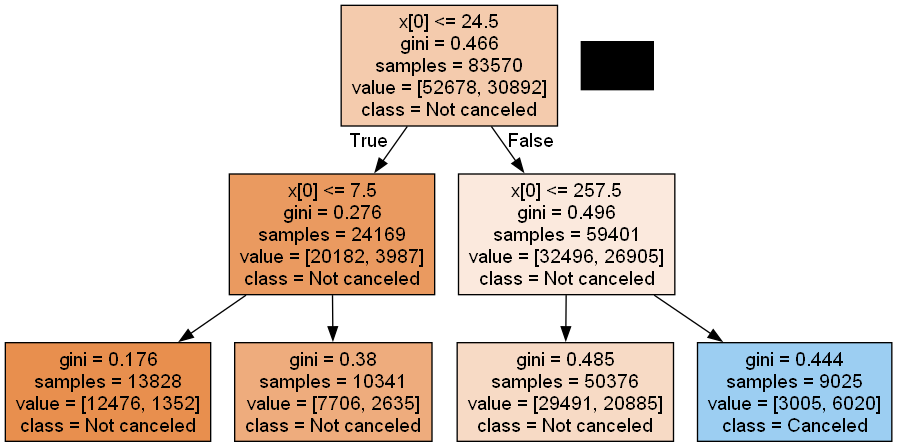

In [61]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, class_names=["Not canceled", "Canceled"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

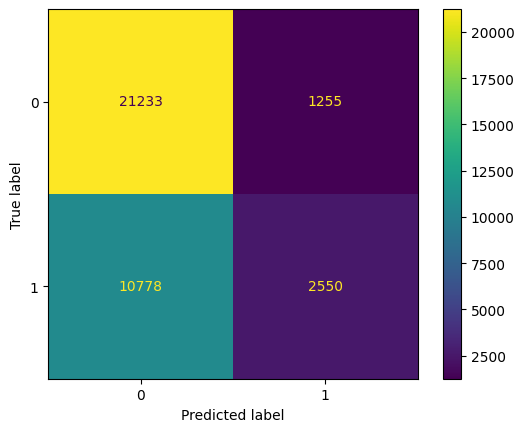

In [62]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [63]:
accuracy_score(y_test, y_pred)

0.6640328344873799

In [64]:
balanced_accuracy_score(y_test, y_pred)

0.5677594944060869

In [74]:
categorical_columns = ["country", "market_segment", "distribution_channel", "arrival_date_month", "meal"]
numeric_columns = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled"]

In [73]:
data[numeric_columns].head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
0,342,0,0,2,0.0,0,BB,0,0,0
1,737,0,0,2,0.0,0,BB,0,0,0
2,7,0,1,1,0.0,0,BB,0,0,0
3,13,0,1,1,0.0,0,BB,0,0,0
4,14,0,2,2,0.0,0,BB,0,0,0


In [75]:
others = data[numeric_columns].to_numpy()
ohe = OneHotEncoder()
encoded_columns = ohe.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()
X = np.concatenate([encoded_columns, others], axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
model = DecisionTreeClassifier()
params = {"min_samples_split": [10, 20, 30, 40]}

clf = GridSearchCV(model, params, scoring="accuracy")
clf.fit(X, y)

print(clf.best_params_)
print(clf.best_score_)

{'min_samples_split': 40}
0.6450334505508332


In [81]:
model = DecisionTreeClassifier()
params = {"min_samples_split": [10, 20, 30, 40]}

clf = GridSearchCV(model, params, scoring="accuracy")
clf.fit(X, y)

print(clf.best_params_)
print(clf.best_score_)